# Natural Language Inference Project - Data Loading and Analysis


In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from typing import Dict, List, Tuple

import warnings
warnings.filterwarnings('ignore')

In [15]:
np.random.seed(42)

In [16]:
def load_nli_dataset(file_path: str) -> List[Dict]:
    """
    Load NLI dataset from JSON file
    
    Args:
        file_path (str): Path to the JSON file
        
    Returns:
        List[Dict]: List of dictionaries containing premise, hypothesis, and label
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Convert the nested dictionary format to a list of examples
    examples = []
    for idx in range(len(data['premise'])):
        example = {
            'premise': data['premise'][str(idx)],
            'hypothesis': data['hypothesis'][str(idx)],
            'label': data['label'][str(idx)]
        }
        examples.append(example)
    
    return examples

def load_all_datasets():
    """Load all datasets (train, validation, test)"""
    print("Loading datasets...")
    train_data = load_nli_dataset('data/train.json')
    print(f"Training data loaded: {len(train_data)} examples")
    val_data = load_nli_dataset('data/validation.json')
    print(f"Validation data loaded: {len(val_data)} examples")
    test_data = load_nli_dataset('data/test.json')
    print(f"Test data loaded: {len(test_data)} examples")
    return train_data, val_data, test_data

# Load all datasets
train_data, val_data, test_data = load_all_datasets()

print(f"\nDataset Summary:")
print(f"Total examples: {len(train_data) + len(val_data) + len(test_data)}")
print(f"Training: {len(train_data)} examples")
print(f"Validation: {len(val_data)} examples") 
print(f"Test: {len(test_data)} examples")


Loading datasets...
Training data loaded: 23088 examples
Validation data loaded: 1304 examples
Test data loaded: 2126 examples

Dataset Summary:
Total examples: 26518
Training: 23088 examples
Validation: 1304 examples
Test: 2126 examples


In [17]:
# Data Exploration and Analysis

def analyze_dataset(data: List[Dict], dataset_name: str):
    """Analyze dataset characteristics"""
    
    print(f"\n=== {dataset_name.upper()} DATASET ANALYSIS ===")
    
    # Label distribution
    labels = [example['label'] for example in data]
    label_counts = Counter(labels)
    
    print(f"\nLabel Distribution:")
    for label, count in label_counts.items():
        percentage = (count / len(data)) * 100
        print(f"  {label}: {count} ({percentage:.2f}%)")
    
    # Text length analysis
    premise_lengths = [len(example['premise'].split()) for example in data]
    hypothesis_lengths = [len(example['hypothesis'].split()) for example in data]
    
    print(f"\nText Length Statistics:")
    print(f"  Premise length - Mean: {np.mean(premise_lengths):.2f}, "
          f"Median: {np.median(premise_lengths):.2f}, "
          f"Max: {max(premise_lengths)}")
    print(f"  Hypothesis length - Mean: {np.mean(hypothesis_lengths):.2f}, "
          f"Median: {np.median(hypothesis_lengths):.2f}, "
          f"Max: {max(hypothesis_lengths)}")
    
    # Sample examples
    print(f"\nSample Examples:")
    for i, example in enumerate(data[:2]):
        print(f"\n  Example {i+1}:")
        print(f"    Premise: {example['premise'][:100]}...")
        print(f"    Hypothesis: {example['hypothesis'][:100]}...")
        print(f"    Label: {example['label']}")
    
    return {
        'label_counts': label_counts,
        'premise_lengths': premise_lengths,
        'hypothesis_lengths': hypothesis_lengths
    }

# Analyze all datasets
train_stats = analyze_dataset(train_data, "Training")
val_stats = analyze_dataset(val_data, "Validation")
test_stats = analyze_dataset(test_data, "Test")



=== TRAINING DATASET ANALYSIS ===

Label Distribution:
  neutral: 14618 (63.31%)
  entails: 8470 (36.69%)

Text Length Statistics:
  Premise length - Mean: 18.08, Median: 16.00, Max: 10587
  Hypothesis length - Mean: 11.73, Median: 11.00, Max: 36

Sample Examples:

  Example 1:
    Premise: Pluto rotates once on its axis every 6.39 Earth days;...
    Hypothesis: Earth rotates on its axis once times in one day....
    Label: neutral

  Example 2:
    Premise: ---Glenn ========================================================= Once per day, the earth rotates a...
    Hypothesis: Earth rotates on its axis once times in one day....
    Label: entails

=== VALIDATION DATASET ANALYSIS ===

Label Distribution:
  neutral: 647 (49.62%)
  entails: 657 (50.38%)

Text Length Statistics:
  Premise length - Mean: 17.31, Median: 15.50, Max: 52
  Hypothesis length - Mean: 12.40, Median: 12.00, Max: 30

Sample Examples:

  Example 1:
    Premise: An introduction to atoms and elements, compounds, atomic

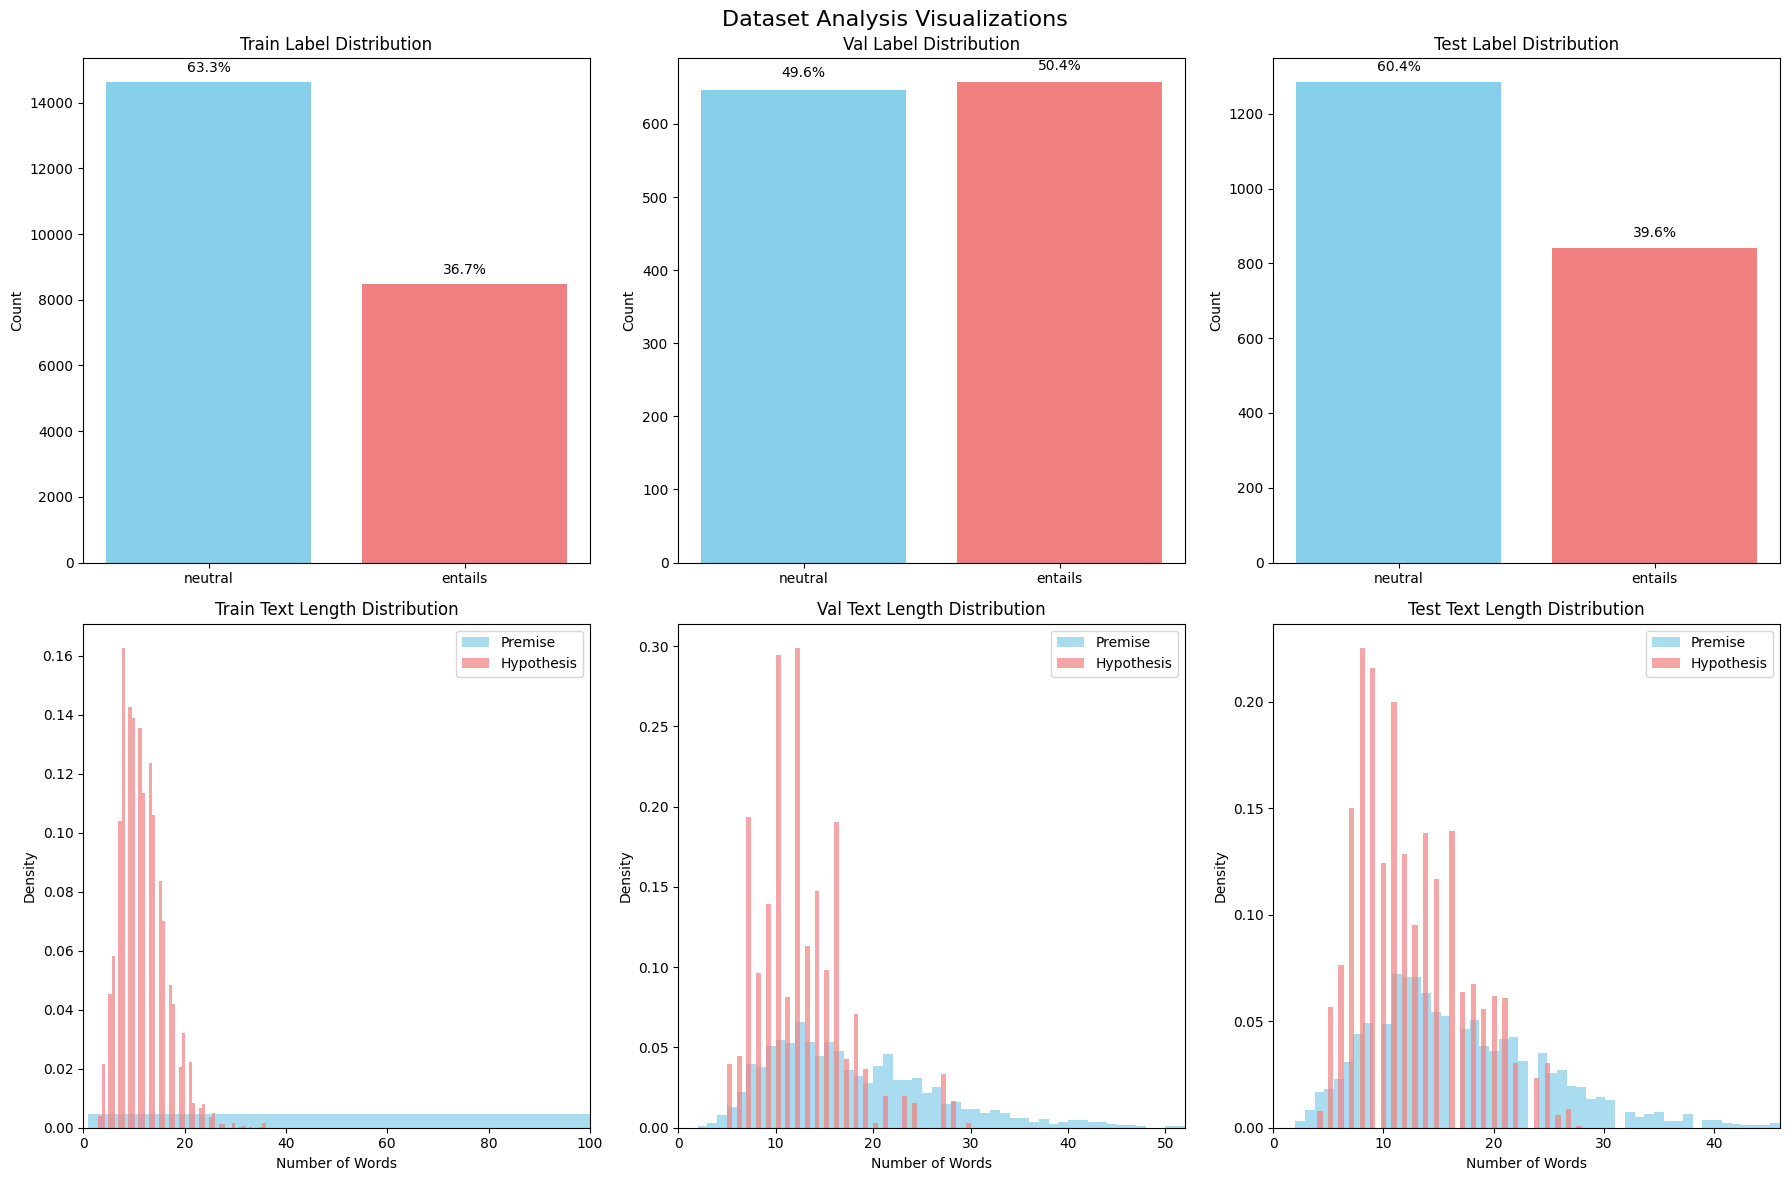

In [18]:
# Visualizations

def create_visualizations(train_stats, val_stats, test_stats):
    """Create visualizations for dataset analysis"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Dataset Analysis Visualizations', fontsize=16)
    
    # Label distribution comparison
    datasets = ['Train', 'Val', 'Test']
    stats_list = [train_stats, val_stats, test_stats]
    
    for i, (dataset, stats) in enumerate(zip(datasets, stats_list)):
        labels = list(stats['label_counts'].keys())
        counts = list(stats['label_counts'].values())
        
        axes[0, i].bar(labels, counts, color=['skyblue', 'lightcoral'])
        axes[0, i].set_title(f'{dataset} Label Distribution')
        axes[0, i].set_ylabel('Count')
        
        # Add percentage labels on bars
        total = sum(counts)
        for j, count in enumerate(counts):
            percentage = (count / total) * 100
            axes[0, i].text(j, count + total*0.01, f'{percentage:.1f}%', 
                           ha='center', va='bottom')
    
    # Text length distributions
    for i, (dataset, stats) in enumerate(zip(datasets, stats_list)):
        axes[1, i].hist(stats['premise_lengths'], bins=50, alpha=0.7, 
                       label='Premise', color='skyblue', density=True)
        axes[1, i].hist(stats['hypothesis_lengths'], bins=50, alpha=0.7, 
                       label='Hypothesis', color='lightcoral', density=True)
        axes[1, i].set_title(f'{dataset} Text Length Distribution')
        axes[1, i].set_xlabel('Number of Words')
        axes[1, i].set_ylabel('Density')
        axes[1, i].legend()
        axes[1, i].set_xlim(0, min(100, max(stats['premise_lengths'] + stats['hypothesis_lengths'])))
    
    plt.tight_layout()
    plt.show()

# Create visualizations
create_visualizations(train_stats, val_stats, test_stats)


In [19]:
# Data Preprocessing Functions

def clean_text(text: str) -> str:
    """
    Clean and preprocess text data
    
    Args:
        text (str): Input text
        
    Returns:
        str: Cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove special characters but keep punctuation
    text = re.sub(r'[^\w\s.,!?;:\'"()-]', '', text)
    
    # Strip leading/trailing whitespace
    text = text.strip()
    
    return text

def tokenize_text(text: str) -> List[str]:
    """
    Simple tokenization function
    
    Args:
        text (str): Input text
        
    Returns:
        List[str]: List of tokens
    """
    return text.split()

def preprocess_dataset(data: List[Dict], clean: bool = True) -> List[Dict]:
    """
    Preprocess dataset
    
    Args:
        data (List[Dict]): List of examples
        clean (bool): Whether to clean text
        
    Returns:
        List[Dict]: Preprocessed examples
    """
    processed_data = []
    
    for example in data:
        premise = example['premise']
        hypothesis = example['hypothesis']
        
        if clean:
            premise = clean_text(premise)
            hypothesis = clean_text(hypothesis)
        
        processed_example = {
            'premise': premise,
            'hypothesis': hypothesis,
            'label': example['label'],
            'premise_tokens': tokenize_text(premise),
            'hypothesis_tokens': tokenize_text(hypothesis)
        }
        processed_data.append(processed_example)
    
    return processed_data

# Preprocess datasets
print("Preprocessing datasets...")
train_processed = preprocess_dataset(train_data, clean=True)
val_processed = preprocess_dataset(val_data, clean=True)
test_processed = preprocess_dataset(test_data, clean=True)

print(f"Preprocessing complete!")
print(f"Sample processed example:")
print(f"  Original premise: {train_data[0]['premise'][:100]}...")
print(f"  Cleaned premise: {train_processed[0]['premise'][:100]}...")
print(f"  Tokens: {train_processed[0]['premise_tokens'][:10]}...")


Preprocessing datasets...
Preprocessing complete!
Sample processed example:
  Original premise: Pluto rotates once on its axis every 6.39 Earth days;...
  Cleaned premise: pluto rotates once on its axis every 6.39 earth days;...
  Tokens: ['pluto', 'rotates', 'once', 'on', 'its', 'axis', 'every', '6.39', 'earth', 'days;']...


In [20]:
# Vocabulary Analysis

def build_vocabulary(data: List[Dict]) -> Dict[str, int]:
    """
    Build vocabulary from dataset
    
    Args:
        data (List[Dict]): List of processed examples
        
    Returns:
        Dict[str, int]: Vocabulary mapping word to frequency
    """
    vocab = Counter()
    
    for example in data:
        vocab.update(example['premise_tokens'])
        vocab.update(example['hypothesis_tokens'])
    
    return dict(vocab)

def analyze_vocabulary(vocab: Dict[str, int], top_k: int = 20):
    """
    Analyze vocabulary characteristics
    
    Args:
        vocab (Dict[str, int]): Vocabulary dictionary
        top_k (int): Number of top words to display
    """
    total_words = sum(vocab.values())
    unique_words = len(vocab)
    
    print(f"Vocabulary Analysis:")
    print(f"  Total word occurrences: {total_words:,}")
    print(f"  Unique words: {unique_words:,}")
    print(f"  Average frequency: {total_words/unique_words:.2f}")
    
    # Most frequent words
    most_frequent = Counter(vocab).most_common(top_k)
    print(f"\nTop {top_k} most frequent words:")
    for word, freq in most_frequent:
        percentage = (freq / total_words) * 100
        print(f"  '{word}': {freq} ({percentage:.2f}%)")
    
    # Word length analysis
    word_lengths = [len(word) for word in vocab.keys()]
    print(f"\nWord length statistics:")
    print(f"  Mean length: {np.mean(word_lengths):.2f}")
    print(f"  Median length: {np.median(word_lengths):.2f}")
    print(f"  Max length: {max(word_lengths)}")

# Build vocabulary from training data
print("Building vocabulary from training data...")
vocabulary = build_vocabulary(train_processed)

# Analyze vocabulary
analyze_vocabulary(vocabulary, top_k=30)

# Save vocabulary for later use
vocab_size = len(vocabulary)
print(f"\nVocabulary size: {vocab_size:,}")
print("Vocabulary built successfully!")


Building vocabulary from training data...
Vocabulary Analysis:
  Total word occurrences: 688,073
  Unique words: 35,863
  Average frequency: 19.19

Top 30 most frequent words:
  'the': 51949 (7.55%)
  'of': 29584 (4.30%)
  'a': 18494 (2.69%)
  'is': 18155 (2.64%)
  'and': 18008 (2.62%)
  'in': 14896 (2.16%)
  'to': 13257 (1.93%)
  'are': 8909 (1.29%)
  'that': 7398 (1.08%)
  'an': 4895 (0.71%)
  'as': 4709 (0.68%)
  'for': 4495 (0.65%)
  'by': 4425 (0.64%)
  'or': 4219 (0.61%)
  'from': 3710 (0.54%)
  'with': 3148 (0.46%)
  'on': 3141 (0.46%)
  'water': 2939 (0.43%)
  'be': 2817 (0.41%)
  'have': 2810 (0.41%)
  'it': 2756 (0.40%)
  'can': 2625 (0.38%)
  'energy': 2504 (0.36%)
  'most': 2267 (0.33%)
  'called': 2263 (0.33%)
  'which': 2176 (0.32%)
  'when': 2150 (0.31%)
  'one': 2137 (0.31%)
  'two': 2034 (0.30%)
  'at': 1835 (0.27%)

Word length statistics:
  Mean length: 8.25
  Median length: 8.00
  Max length: 82

Vocabulary size: 35,863
Vocabulary built successfully!


In [21]:
# Dataset Summary and Next Steps

print("="*60)
print("DATASET LOADING COMPLETE")
print("="*60)

print(f"\nDataset Overview:")
print(f"  Training examples: {len(train_processed):,}")
print(f"  Validation examples: {len(val_processed):,}")
print(f"  Test examples: {len(test_processed):,}")
print(f"  Total examples: {len(train_processed) + len(val_processed) + len(test_processed):,}")

print(f"\nData Characteristics:")
print(f"  Labels: {set([ex['label'] for ex in train_processed])}")
print(f"  Vocabulary size: {vocab_size:,}")
print(f"  Average premise length: {np.mean([len(ex['premise_tokens']) for ex in train_processed]):.1f} words")
print(f"  Average hypothesis length: {np.mean([len(ex['hypothesis_tokens']) for ex in train_processed]):.1f} words")

print(f"\nNext Steps for Model Development:")
print("  1. Create word-to-index mappings")
print("  2. Implement data loaders with batching")
print("  3. Design and implement three different model architectures:")
print("     - Model 1: RNN/LSTM-based with attention")
print("     - Model 2: Transformer-based architecture") 
print("     - Model 3: Hybrid architecture (e.g., CNN + RNN)")
print("  4. Implement training and evaluation loops")
print("  5. Conduct ablation studies on attention mechanisms")
print("  6. Perform qualitative analysis with attention visualizations")

print(f"\nData is ready for model development!")


DATASET LOADING COMPLETE

Dataset Overview:
  Training examples: 23,088
  Validation examples: 1,304
  Test examples: 2,126
  Total examples: 26,518

Data Characteristics:
  Labels: {'entails', 'neutral'}
  Vocabulary size: 35,863
  Average premise length: 18.1 words
  Average hypothesis length: 11.7 words

Next Steps for Model Development:
  1. Create word-to-index mappings
  2. Implement data loaders with batching
  3. Design and implement three different model architectures:
     - Model 1: RNN/LSTM-based with attention
     - Model 2: Transformer-based architecture
     - Model 3: Hybrid architecture (e.g., CNN + RNN)
  4. Implement training and evaluation loops
  5. Conduct ablation studies on attention mechanisms
  6. Perform qualitative analysis with attention visualizations

Data is ready for model development!


# Base Model Design


In [22]:
# Import PyTorch and related libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from tqdm import tqdm

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)


Using device: cpu


In [23]:
# Word-to-Index Mappings and Vocabulary Utilities

class Vocabulary:
    """Vocabulary class for word-to-index mappings"""
    
    def __init__(self, vocab_dict=None, min_freq=1):
        self.word2idx = {}
        self.idx2word = {}
        self.word_freq = {}
        
        # Special tokens
        self.PAD_TOKEN = '<PAD>'
        self.UNK_TOKEN = '<UNK>'
        
        # Add special tokens
        self.word2idx[self.PAD_TOKEN] = 0
        self.word2idx[self.UNK_TOKEN] = 1
        self.idx2word[0] = self.PAD_TOKEN
        self.idx2word[1] = self.UNK_TOKEN
        
        if vocab_dict is not None:
            self.build_vocab(vocab_dict, min_freq)
    
    def build_vocab(self, vocab_dict, min_freq=1):
        """Build vocabulary from word frequency dictionary"""
        idx = 2  # Start from 2 (0 and 1 are reserved for PAD and UNK)
        
        for word, freq in vocab_dict.items():
            if freq >= min_freq:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                self.word_freq[word] = freq
                idx += 1
    
    def encode(self, tokens):
        """Convert tokens to indices"""
        return [self.word2idx.get(token, self.word2idx[self.UNK_TOKEN]) for token in tokens]
    
    def decode(self, indices):
        """Convert indices to tokens"""
        return [self.idx2word.get(idx, self.UNK_TOKEN) for idx in indices]
    
    def __len__(self):
        return len(self.word2idx)
    
    def get_vocab_size(self):
        return len(self.word2idx)

# Create vocabulary from training data
print("Creating vocabulary...")
vocab = Vocabulary(vocabulary, min_freq=2)  # Filter out words with frequency < 2
print(f"Vocabulary size: {vocab.get_vocab_size()}")
print(f"Sample words: {list(vocab.word2idx.keys())[:10]}")

# Test encoding/decoding
sample_tokens = ['the', 'cat', 'is', 'sleeping', 'unknown_word']
sample_indices = vocab.encode(sample_tokens)
decoded_tokens = vocab.decode(sample_indices)
print(f"Original tokens: {sample_tokens}")
print(f"Encoded indices: {sample_indices}")
print(f"Decoded tokens: {decoded_tokens}")


Creating vocabulary...
Vocabulary size: 16552
Sample words: ['<PAD>', '<UNK>', 'pluto', 'rotates', 'once', 'on', 'its', 'axis', 'every', 'earth']
Original tokens: ['the', 'cat', 'is', 'sleeping', 'unknown_word']
Encoded indices: [16, 8864, 29, 6538, 1]
Decoded tokens: ['the', 'cat', 'is', 'sleeping', '<UNK>']


In [24]:
# Dataset and DataLoader Implementation

class NLIDataset(Dataset):
    """PyTorch Dataset for NLI data"""
    
    def __init__(self, data, vocab, max_length=128):
        self.data = data
        self.vocab = vocab
        self.max_length = max_length
        
        # Create label mapping
        self.label2idx = {'neutral': 0, 'entails': 1}
        self.idx2label = {0: 'neutral', 1: 'entails'}
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        example = self.data[idx]
        
        # Encode tokens
        premise_indices = self.vocab.encode(example['premise_tokens'])
        hypothesis_indices = self.vocab.encode(example['hypothesis_tokens'])
        
        # Truncate if too long
        premise_indices = premise_indices[:self.max_length]
        hypothesis_indices = hypothesis_indices[:self.max_length]
        
        # Ensure minimum length of 1 (add padding token if empty)
        if len(premise_indices) == 0:
            premise_indices = [0]  # PAD token
        if len(hypothesis_indices) == 0:
            hypothesis_indices = [0]  # PAD token
        
        # Get label
        label = self.label2idx[example['label']]
        
        return {
            'premise': torch.tensor(premise_indices, dtype=torch.long),
            'hypothesis': torch.tensor(hypothesis_indices, dtype=torch.long),
            'label': torch.tensor(label, dtype=torch.long),
            'premise_length': len(premise_indices),
            'hypothesis_length': len(hypothesis_indices)
        }

def collate_fn(batch):
    """Custom collate function for padding sequences"""
    premises = [item['premise'] for item in batch]
    hypotheses = [item['hypothesis'] for item in batch]
    labels = torch.stack([item['label'] for item in batch])
    premise_lengths = torch.tensor([item['premise_length'] for item in batch])
    hypothesis_lengths = torch.tensor([item['hypothesis_length'] for item in batch])
    
    # Pad sequences
    premises_padded = torch.nn.utils.rnn.pad_sequence(premises, batch_first=True, padding_value=0)
    hypotheses_padded = torch.nn.utils.rnn.pad_sequence(hypotheses, batch_first=True, padding_value=0)
    
    return {
        'premise': premises_padded,
        'hypothesis': hypotheses_padded,
        'label': labels,
        'premise_length': premise_lengths,
        'hypothesis_length': hypothesis_lengths
    }

# Create datasets
print("Creating datasets...")
train_dataset = NLIDataset(train_processed, vocab, max_length=128)
val_dataset = NLIDataset(val_processed, vocab, max_length=128)
test_dataset = NLIDataset(test_processed, vocab, max_length=128)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

print(f"Data loaders created:")
print(f"  Training batches: {len(train_loader)}")
print(f"  Validation batches: {len(val_loader)}")
print(f"  Test batches: {len(test_loader)}")

# Test data loader
sample_batch = next(iter(train_loader))
print(f"\nSample batch shapes:")
print(f"  Premise: {sample_batch['premise'].shape}")
print(f"  Hypothesis: {sample_batch['hypothesis'].shape}")
print(f"  Labels: {sample_batch['label'].shape}")
print(f"  Premise lengths: {sample_batch['premise_length']}")
print(f"  Hypothesis lengths: {sample_batch['hypothesis_length']}")


Creating datasets...
Data loaders created:
  Training batches: 722
  Validation batches: 41
  Test batches: 67

Sample batch shapes:
  Premise: torch.Size([32, 37])
  Hypothesis: torch.Size([32, 17])
  Labels: torch.Size([32])
  Premise lengths: tensor([25,  9, 14, 27, 15, 17, 24,  9,  6, 27, 14,  7, 19,  6, 22, 31, 11, 23,
        23, 13, 18, 15, 21,  8,  9, 11,  5, 17, 37, 29, 13, 12])
  Hypothesis lengths: tensor([12, 12, 10, 11, 17, 15, 14, 12,  8, 17, 16, 13, 15, 10, 10,  8, 14, 13,
        14,  7, 12,  9, 15, 10, 11,  9, 13,  8, 11, 12, 10,  8])


In [25]:
class BiRNNModel(nn.Module):
    """Bidirectional RNN model for Natural Language Inference (simple, solid baseline).
       - Shared embedding + shared BiRNN encoder for premise/hypothesis
       - Representation = concat of last forward/backward hidden states (top layer)
       - Features = [p, h, |p-h|, p*h] -> small MLP -> logits
    """
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128,
                 num_layers=1, dropout=0.2, rnn_type='LSTM', padding_idx=0, num_classes=2):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.rnn_type = rnn_type.upper()

        # Embedding
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)

        # BiRNN (dropout only applies between stacked layers; set to 0 if single layer)
        rnn_dropout = dropout if num_layers > 1 else 0.0
        if self.rnn_type == 'LSTM':
            self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers,
                               batch_first=True, bidirectional=True, dropout=rnn_dropout)
        elif self.rnn_type == 'GRU':
            self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers,
                              batch_first=True, bidirectional=True, dropout=rnn_dropout)
        else:  # vanilla RNN (tanh)
            self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers,
                              batch_first=True, bidirectional=True, nonlinearity='tanh', dropout=rnn_dropout)

        self.dropout = nn.Dropout(dropout)

        # Classifier on [p, h, |p-h|, p*h] (each p/h is 2*hidden_dim)
        feat_dim = (hidden_dim * 2) * 4
        self.classifier = nn.Sequential(
            nn.Linear(feat_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim * 2, num_classes)  # 2 classes: entails / neutral
        )

    def _encode(self, x_ids, x_lengths):
        """
        Encode a sequence with BiRNN and return the last hidden state concat (fwd||bwd) from top layer.
        Args:
            x_ids:      (B, T) long
            x_lengths:  (B,)  long or int tensor with true lengths (>=1)
        Returns:
            rep: (B, 2H)
        """
        emb = self.embedding(x_ids)  # (B, T, E)
        # pack for efficient/padded-safe RNN
        x_lengths = torch.clamp(x_lengths, min=1).to(x_ids.device)
        packed = nn.utils.rnn.pack_padded_sequence(emb, x_lengths.cpu(), batch_first=True, enforce_sorted=False)
        if self.rnn_type == 'LSTM':
            _, (h_n, _) = self.rnn(packed)  # h_n: (num_layers*2, B, H)
        else:
            _, h_n = self.rnn(packed)       # h_n: (num_layers*2, B, H)

        # take top layer forward and backward states
        # layout in bidirectional: [layer0_fwd, layer0_bwd, ..., layerL-1_fwd, layerL-1_bwd]
        fwd_top = h_n[-2, :, :]  # (B, H)
        bwd_top = h_n[-1, :, :]  # (B, H)
        rep = torch.cat([fwd_top, bwd_top], dim=-1)  # (B, 2H)
        rep = self.dropout(rep)
        return rep

    def forward(self, premise, hypothesis, premise_lengths, hypothesis_lengths):
        """
        Args:
            premise:            (B, T) long
            hypothesis:         (B, T) long
            premise_lengths:    (B,)  long
            hypothesis_lengths: (B,)  long
        Returns:
            logits: (B, num_classes)
        """
        p = self._encode(premise, premise_lengths)      # (B, 2H)
        h = self._encode(hypothesis, hypothesis_lengths)# (B, 2H)

        feats = torch.cat([p, h, torch.abs(p - h), p * h], dim=-1)  # (B, 8H)
        logits = self.classifier(feats)  # (B, C)
        return logits


# ---- Create & sanity-check model ----
print("Creating BiRNN model...")
model = BiRNNModel(
    vocab_size=vocab.get_vocab_size(),  # keep your existing vocab API
    embedding_dim=128,
    hidden_dim=128,
    num_layers=1,          # start simple; you can try 2 later
    dropout=0.2,
    rnn_type='LSTM',
    padding_idx=0,
    num_classes=2
).to(device)

print("Model created successfully!")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# Test model with a sample batch (expects keys below in your DataLoader batch)
model.eval()
with torch.no_grad():
    sample_batch = {k: v.to(device) for k, v in sample_batch.items()}
    output = model(
        sample_batch['premise'],
        sample_batch['hypothesis'],
        sample_batch['premise_length'],
        sample_batch['hypothesis_length']
    )
    print(f"Model output shape: {output.shape}")         # (B, 2)
    print(f"Sample predictions (first 3):", torch.softmax(output, dim=1)[:3])


Creating BiRNN model...
Model created successfully!
Total parameters: 2,645,762
Trainable parameters: 2,645,762
Model output shape: torch.Size([32, 2])
Sample predictions (first 3): tensor([[0.5152, 0.4848],
        [0.5086, 0.4914],
        [0.5035, 0.4965]])


In [26]:
# Training and Evaluation Functions

def train_epoch(model, train_loader, optimizer, criterion, device):
    """Train the model for one epoch"""
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    progress_bar = tqdm(train_loader, desc="Training")
    
    for batch in progress_bar:
        # Move batch to device
        premise = batch['premise'].to(device)
        hypothesis = batch['hypothesis'].to(device)
        labels = batch['label'].to(device)
        premise_lengths = batch['premise_length'].to(device)
        hypothesis_lengths = batch['hypothesis_length'].to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(premise, hypothesis, premise_lengths, hypothesis_lengths)
        loss = criterion(logits, labels)
        
        # Backward pass
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Update weights
        optimizer.step()
        
        # Statistics
        total_loss += loss.item()
        _, predicted = torch.max(logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Update progress bar
        progress_bar.set_postfix({
            'Loss': f'{loss.item():.4f}',
            'Acc': f'{100 * correct / total:.2f}%'
        })
    
    return total_loss / len(train_loader), 100 * correct / total

def evaluate(model, data_loader, criterion, device):
    """Evaluate the model"""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            # Move batch to device
            premise = batch['premise'].to(device)
            hypothesis = batch['hypothesis'].to(device)
            labels = batch['label'].to(device)
            premise_lengths = batch['premise_length'].to(device)
            hypothesis_lengths = batch['hypothesis_length'].to(device)
            
            # Forward pass
            logits = model(premise, hypothesis, premise_lengths, hypothesis_lengths)
            loss = criterion(logits, labels)
            
            # Statistics
            total_loss += loss.item()
            _, predicted = torch.max(logits.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Store predictions and labels
            all_predictions.extend(predicted.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    
    accuracy = 100 * correct / total
    avg_loss = total_loss / len(data_loader)
    
    return avg_loss, accuracy, all_predictions, all_labels

def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001):
    """Train the model for multiple epochs"""
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)
    
    # Training history
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    best_val_acc = 0
    best_model_state = None
    
    print(f"Starting training for {num_epochs} epochs...")
    print(f"Learning rate: {learning_rate}")
    print(f"Device: {device}")
    print("-" * 50)
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        
        # Train
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
        
        # Validate
        val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion, device)
        
        # Learning rate scheduling
        scheduler.step(val_loss)
        
        # Store history
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Best Val Acc: {best_val_acc:.2f}%")
        print("-" * 50)
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with validation accuracy: {best_val_acc:.2f}%")
    
    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'best_val_acc': best_val_acc
    }

# Test training with a few epochs
print("Testing training loop...")
training_history = train_model(model, train_loader, val_loader, num_epochs=3, learning_rate=0.001)


Testing training loop...
Starting training for 3 epochs...
Learning rate: 0.001
Device: cpu
--------------------------------------------------
Epoch 1/3


Evaluating: 100%|██████████| 41/41 [00:00<00:00, 73.26it/s]


Train Loss: 0.4696, Train Acc: 77.97%
Val Loss: 0.5323, Val Acc: 73.01%
Best Val Acc: 73.01%
--------------------------------------------------
Epoch 2/3


Evaluating: 100%|██████████| 41/41 [00:00<00:00, 58.17it/s]


Train Loss: 0.3214, Train Acc: 86.59%
Val Loss: 0.5465, Val Acc: 72.85%
Best Val Acc: 73.01%
--------------------------------------------------
Epoch 3/3


Evaluating: 100%|██████████| 41/41 [00:00<00:00, 68.56it/s]

Train Loss: 0.2310, Train Acc: 90.65%
Val Loss: 0.6447, Val Acc: 70.94%
Best Val Acc: 73.01%
--------------------------------------------------
Loaded best model with validation accuracy: 73.01%


Plotting training history...


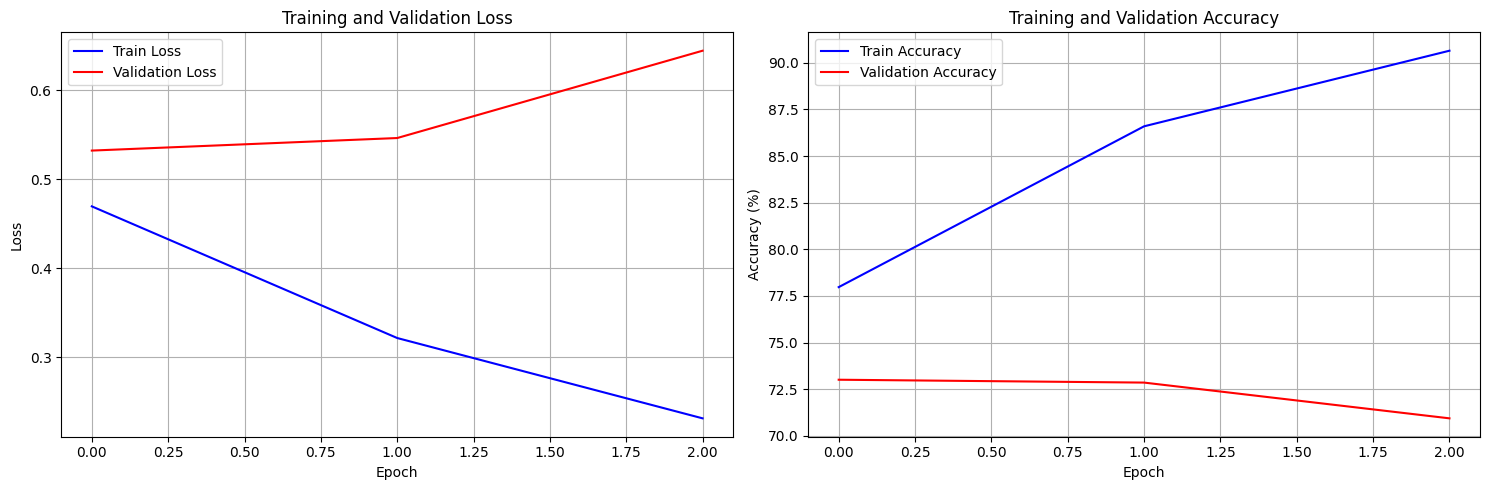


Comprehensive model evaluation...


Evaluating: 100%|██████████| 67/67 [00:00<00:00, 71.69it/s]


Test Results:
  Test Loss: 0.5951
  Test Accuracy: 75.87%

Classification Report:
  Neutral - Precision: 0.749, Recall: 0.903, F1: 0.819
  Entails - Precision: 0.784, Recall: 0.539, F1: 0.639
  Macro Avg - Precision: 0.767, Recall: 0.721, F1: 0.729


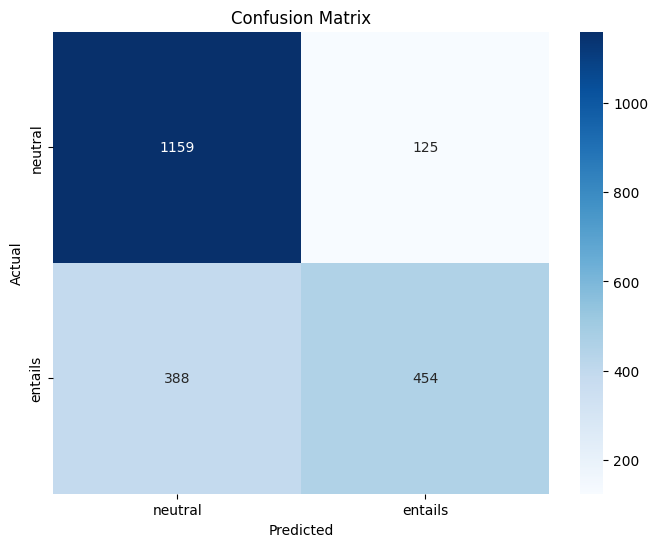


Testing with sample examples...

Premise: The cat is sleeping on the couch.
Hypothesis: A cat is resting on furniture.
Predicted: entails
Confidence: 0.705
Probabilities: Neutral=0.295, Entails=0.705

Premise: Water boils at 100 degrees Celsius.
Hypothesis: Water turns into steam at high temperature.
Predicted: entails
Confidence: 0.679
Probabilities: Neutral=0.321, Entails=0.679

Premise: The sky is blue.
Hypothesis: The ocean is green.
Predicted: entails
Confidence: 0.814
Probabilities: Neutral=0.186, Entails=0.814


In [ ]:
# Model Evaluation and Visualization

def plot_training_history(history):
    """Plot training history"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(history['train_losses'], label='Train Loss', color='blue')
    ax1.plot(history['val_losses'], label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracies
    ax2.plot(history['train_accuracies'], label='Train Accuracy', color='blue')
    ax2.plot(history['val_accuracies'], label='Validation Accuracy', color='red')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def evaluate_model_comprehensive(model, test_loader, device):
    """Comprehensive model evaluation"""
    criterion = nn.CrossEntropyLoss()
    test_loss, test_acc, predictions, true_labels = evaluate(model, test_loader, criterion, device)
    class_names = ['neutral', 'entails']
    report = classification_report(true_labels, predictions, target_names=class_names, output_dict=True)
    cm = confusion_matrix(true_labels, predictions)
    
    print(f"Test Results:")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Test Accuracy: {test_acc:.2f}%")
    print(f"\nClassification Report:")
    print(f"  Neutral - Precision: {report['neutral']['precision']:.3f}, Recall: {report['neutral']['recall']:.3f}, F1: {report['neutral']['f1-score']:.3f}")
    print(f"  Entails - Precision: {report['entails']['precision']:.3f}, Recall: {report['entails']['recall']:.3f}, F1: {report['entails']['f1-score']:.3f}")
    print(f"  Macro Avg - Precision: {report['macro avg']['precision']:.3f}, Recall: {report['macro avg']['recall']:.3f}, F1: {report['macro avg']['f1-score']:.3f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return {
        'test_loss': test_loss,
        'test_accuracy': test_acc,
        'predictions': predictions,
        'true_labels': true_labels,
        'classification_report': report,
        'confusion_matrix': cm
    }

def predict_example(model, premise_text, hypothesis_text, vocab, device):
    """Predict on a single example"""
    model.eval()
    
    # Preprocess text
    premise_clean = clean_text(premise_text)
    hypothesis_clean = clean_text(hypothesis_text)
    
    premise_tokens = tokenize_text(premise_clean)
    hypothesis_tokens = tokenize_text(hypothesis_clean)
    
    # Encode
    premise_indices = vocab.encode(premise_tokens)
    hypothesis_indices = vocab.encode(hypothesis_tokens)
    
    # Convert to tensors
    premise_tensor = torch.tensor([premise_indices], dtype=torch.long).to(device)
    hypothesis_tensor = torch.tensor([hypothesis_indices], dtype=torch.long).to(device)
    premise_length = torch.tensor([len(premise_indices)], dtype=torch.long).to(device)
    hypothesis_length = torch.tensor([len(hypothesis_indices)], dtype=torch.long).to(device)
    
    with torch.no_grad():
        logits = model(premise_tensor, hypothesis_tensor, premise_length, hypothesis_length)
        probabilities = torch.softmax(logits, dim=1)
        predicted_class = torch.argmax(logits, dim=1).item()
    
    class_names = ['neutral', 'entails']
    predicted_label = class_names[predicted_class]
    
    print(f"Premise: {premise_text}")
    print(f"Hypothesis: {hypothesis_text}")
    print(f"Predicted: {predicted_label}")
    print(f"Confidence: {probabilities[0][predicted_class]:.3f}")
    print(f"Probabilities: Neutral={probabilities[0][0]:.3f}, Entails={probabilities[0][1]:.3f}")
    
    return predicted_label, probabilities[0].cpu().tolist()

# Plot training history
print("Plotting training history...")
plot_training_history(training_history)

# Comprehensive evaluation
print("\nComprehensive model evaluation...")
test_results = evaluate_model_comprehensive(model, test_loader, device)

# Test with sample examples
print("\nTesting with sample examples...")
sample_examples = [
    ("The cat is sleeping on the couch.", "A cat is resting on furniture."),
    ("Water boils at 100 degrees Celsius.", "Water turns into steam at high temperature."),
    ("The sky is blue.", "The ocean is green.")
]

for premise, hypothesis in sample_examples:
    print("\n" + "="*50)
    predict_example(model, premise, hypothesis, vocab, device)


In [ ]:

def print_model_summary(model):
    """Print detailed model architecture summary"""
    print("="*60)
    print("BiRNN MODEL ARCHITECTURE SUMMARY")
    print("="*60)

    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    vocab_size = model.embedding.num_embeddings
    embedding_dim = model.embedding.embedding_dim
    hidden_dim = model.hidden_dim
    num_layers = model.num_layers
    rnn_type = model.rnn_type
    dropout_rate = getattr(model.dropout, "p", None)

    # Feature dim going into the classifier: [p, h, |p-h|, p*h] with each = 2H
    feat_dim = (hidden_dim * 2) * 4

    print(f"Model Type: Bidirectional RNN (no attention)")
    print(f"RNN Type: {rnn_type}")
    print(f"Total Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")
    print(f"Vocabulary Size: {vocab_size:,}")
    print(f"Embedding Dimension: {embedding_dim}")
    print(f"Hidden Dimension: {hidden_dim}")
    print(f"Number of RNN Layers: {num_layers}")
    if dropout_rate is not None:
        print(f"Dropout Rate: {dropout_rate}")

    print("\nArchitecture Components:")
    print(f"  1. Embedding Layer: {vocab_size} → {embedding_dim} (padding_idx=0)")
    print(f"  2. Bidirectional {rnn_type}: {embedding_dim} → {hidden_dim*2} (per time step)")
    print(f"  3. Sequence Representation: concat(last_fwd, last_bwd) → (2H)")
    print(f"  4. Pair Features: [p, h, |p−h|, p*h] → {feat_dim}")
    # Infer classifier output size from last Linear layer
    last_linear = [m for m in model.classifier if isinstance(m, torch.nn.Linear)][-1]
    print(f"  5. Classification Head: {feat_dim} → {last_linear.out_features}")

    print("\nModel Features:")
    print(f"  ✓ Bidirectional processing (forward + backward)")
    print(f"  ✓ Last-hidden pooling from top BiRNN layer")
    print(f"  ✓ Feature fusion: [p, h, |p−h|, p*h]")
    print(f"  ✓ Dropout regularization")

    print("="*60)


def save_model(model, vocab, filepath):
    """Save model and vocabulary"""
    config = {
        'vocab_size': model.embedding.num_embeddings,
        'embedding_dim': model.embedding.embedding_dim,
        'hidden_dim': model.hidden_dim,
        'num_layers': model.num_layers,
        'dropout': getattr(model.dropout, 'p', 0.0),
        'rnn_type': model.rnn_type,
        'padding_idx': 0,
        'num_classes': [m for m in model.classifier if isinstance(m, torch.nn.Linear)][-1].out_features
    }
    torch.save({
        'model_state_dict': model.state_dict(),
        'vocab': vocab,
        'model_config': config
    }, filepath)
    print(f"Model saved to {filepath}")


def load_model(filepath, device):
    """Load model and vocabulary"""
    checkpoint = torch.load(filepath, map_store=torch.cuda if torch.cuda.is_available() else None, map_location=device)
    config = checkpoint['model_config']

    # Recreate model (expects BiRNNModel in scope)
    model = BiRNNModel(**config).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    vocab = checkpoint['vocab']

    print(f"Model loaded from {filepath}")
    return model, vocab


# Print model summary
print_model_summary(model)

# Save the trained model
model_save_path = "birnn_nli_model.pth"
save_model(model, vocab, model_save_path)

print("\nBiRNN Base Model Implementation Complete!")
print("Model is ready for Natural Language Inference tasks.")
print("Key features implemented:")
print("  - Bidirectional LSTM/GRU/RNN processing (configurable)")
print("  - Last-hidden pooling (no attention) for clean baseline")
print("  - Pairwise feature fusion: [p, h, |p−h|, p*h]")
print("  - Simple classifier head + checkpoint save/load")


BiRNN MODEL ARCHITECTURE SUMMARY
Model Type: Bidirectional RNN (no attention)
RNN Type: LSTM
Total Parameters: 2,645,762
Trainable Parameters: 2,645,762
Vocabulary Size: 16,552
Embedding Dimension: 128
Hidden Dimension: 128
Number of RNN Layers: 1
Dropout Rate: 0.2

Architecture Components:
  1. Embedding Layer: 16552 → 128 (padding_idx=0)
  2. Bidirectional LSTM: 128 → 256 (per time step)
  3. Sequence Representation: concat(last_fwd, last_bwd) → (2H)
  4. Pair Features: [p, h, |p−h|, p*h] → 1024
  5. Classification Head: 1024 → 2

Model Features:
  ✓ Bidirectional processing (forward + backward)
  ✓ Last-hidden pooling from top BiRNN layer
  ✓ Feature fusion: [p, h, |p−h|, p*h]
  ✓ Dropout regularization
Model saved to birnn_nli_model.pth

BiRNN Base Model Implementation Complete!
Model is ready for Natural Language Inference tasks.
Key features implemented:
  - Bidirectional LSTM/GRU/RNN processing (configurable)
  - Last-hidden pooling (no attention) for clean baseline
  - Pairwise